In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [7]:
df = pd.read_csv("Crop_recommendation.csv")
display(df)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


# Analizando os dados

In [14]:
df.shape

(2200, 8)

In [19]:
df["label"].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [8]:
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

<AxesSubplot:>

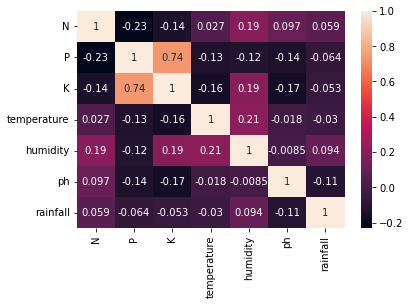

In [9]:
sns.heatmap(df.corr(),annot=True)

In [13]:
import plotly.express as px
fig = px.scatter( x = df['temperature'],
                  y = df['rainfall'],
                  color = df['label']
                     )
fig.show()

# Separando e treinando dados

In [20]:
x = df.drop(columns = 'label') 
y = df['label']                

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [22]:
lda = LinearDiscriminantAnalysis()  
lda.fit(x_train,y_train) 

LinearDiscriminantAnalysis()

In [25]:
y_predicoes = lda.predict(x_test) 

In [26]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report
print(classification_report(y_test, y_predicoes))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.74      0.85      0.79        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       0.94      1.00      0.97        17
      grapes       1.00      1.00      1.00        14
        jute       0.77      1.00      0.87        23
 kidneybeans       0.91      1.00      0.95        20
      lentil       0.62      0.91      0.74        11
       maize       1.00      0.95      0.98        21
       mango       0.90      1.00      0.95        19
   mothbeans       1.00      0.83      0.91        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       1.00    

In [27]:
from sklearn.metrics import confusion_matrix

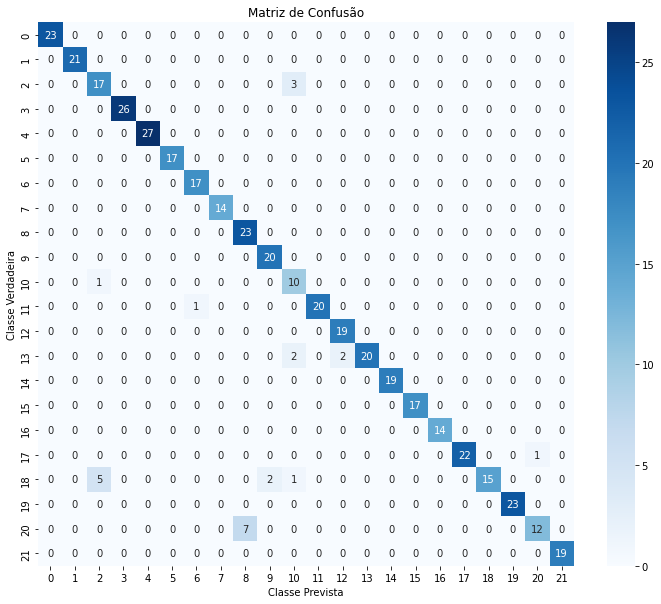

In [52]:
# Criando matriz de confusão
cm = confusion_matrix(y_test, y_predicoes)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão")
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Verdadeira")
plt.show()

# Mapeando os alimentos com as respostas do ML

In [1]:
mapeamento_alimentos = {
    0: 'apple',
    1: 'banana',
    2: 'blackgram',
    3: 'chickpea',
    4: 'coconut',
    5: 'coffee',
    6: 'cotton',
    7: 'grapes',
    8: 'jute',
    9: 'kidneybeans',
    10: 'lentil',
    11: 'maize',
    12: 'mango',
    13: 'mothbeans',
    14: 'mungbean',
    15: 'muskmelon',
    16: 'orange',
    17: 'papaya',
    18: 'pigeonpeas',
    19: 'pomegranate',
    20: 'rice',
    21: 'watermelon'
}

In [4]:
for i in mapeamento_alimentos:
    print(mapeamento_alimentos[i])

apple
banana
blackgram
chickpea
coconut
coffee
cotton
grapes
jute
kidneybeans
lentil
maize
mango
mothbeans
mungbean
muskmelon
orange
papaya
pigeonpeas
pomegranate
rice
watermelon


# Testando com inputs novos

In [50]:
input_example = [91,65,45,25.36059237,72.03645255,2.043496655,116.5888455]  
probabilities = lda.predict_proba([input_example])
predicted_class = np.argmax(probabilities)
predicted_alimento = mapeamento_alimentos[predicted_class]
certainty = probabilities[0][predicted_class] * 100

print(f"Alimento previsto: {predicted_alimento}")
print(f"Porcentagem de Certeza: {certainty:.2f}%")

Alimento previsto: banana
Porcentagem de Certeza: 100.00%


In [44]:
input_example = [87,50,20,25.61707368,63.4711755,7.576418207000001,108.8303762]  
probabilities = lda.predict_proba([input_example])
predicted_class = np.argmax(probabilities)
predicted_alimento = mapeamento_alimentos[predicted_class]
certainty = probabilities[0][predicted_class] * 100

print(f"Alimento previsto: {predicted_alimento}")
print(f"Porcentagem de Certeza: {certainty:.2f}%")

Alimento previsto: maize
Porcentagem de Certeza: 99.99%
